# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 10</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 3 - Guia de Modelagem Preditiva com Linguagem Python e TensorFlow

![title](imagens/mini-projeto3.png)

Neste Mini-Projeto vamos apresentar um guia básico de modelagem preditiva usando Linguagem Python e TensorFlow, o principal framework para construção de modelos de Machine Learning e Deep Learning e para construir aplicações comerciais de Inteligência Artificial.

Este é um guia básico pois o TensorFlow é um framework extenso. O TensorFlow é abordado em detalhes nos cursos da <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial">Formação Inteligência Artificial</a> (especialmente no curso Deep Learning Frameworks) e na <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial-aplicada-a-medicina">Formação IA Aplicada à Medicina</a>.

Na <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a>, no curso de Machine Learning também há um módulo sobre TensorFlow. Alguns projetos com TensorFlow podem ser encontrados no curso de IA Aplicada a Finanças da <a href="https://www.datascienceacademy.com.br/bundle/formacao-engenheiro-blockchain">Formação Engenheiro Blockchain</a>.

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.5.0


## Carregando os Dados

### Car Price

#### Características:

* Número de Observções: 205
* São 31 colunas, sendo a coluna preço o nosso objeto a ser previsto
* Todos os dados estão devidamente tratados e prontos para utilização em aprendizado máquina.

In [4]:
base = pd.read_csv('car_dataset.csv')

In [5]:
# Shape
base.shape

(205, 31)

In [6]:
base.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'Medium', 'Highend'],
      dtype='object')

In [7]:
# Visualiza os dados
base.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


Vamos dividir os dados em treino e teste com proporção 75/25.

In [8]:
# Split dos dados
X_train, X_test, y_train, y_test = train_test_split(base.iloc[:,1:], base.iloc[:,0], test_size=0.25)

## Criação do Modelo

Queremos encontrar os parâmetros (**W**) que permitem prever a saída y a partir da entrada x:

$y = w_1 x + w_0$

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:

*layers.Dense(1, use_bias=True, input_shape=(1,))*

In [9]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential()
    
    model.add(tf.keras.layers.Dense(units=1,
                                activation='linear',
                                input_shape=(X_train.shape[1], )))

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [11]:
# Cria o modelo 
modelo = modelo_linear()

### Treinamento do Modelo

In [15]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * X_train.shape[0]
#print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

In [12]:
"""# O parâmetro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [16]:
#Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [19]:
"""# Lista para as previsões
predictions_list = []

In [20]:
"""# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

In [21]:
"""# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [22]:
"""# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [18]:
# Treinamento
history = modelo.fit(X_train, 
                     y_train, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping])

Epoch 1/4000
1/1 [==============================] - 1s 700ms/step - loss: 243352672.0000 - mae: 13736.9658 - mse: 243352672.0000 - val_loss: 185891008.0000 - val_mae: 11398.3760 - val_mse: 185891008.0000
Epoch 2/4000
1/1 [==============================] - 0s 32ms/step - loss: 242429760.0000 - mae: 13705.8301 - mse: 242429760.0000 - val_loss: 185129424.0000 - val_mae: 11369.0215 - val_mse: 185129424.0000
Epoch 3/4000
1/1 [==============================] - 0s 34ms/step - loss: 241508896.0000 - mae: 13674.6973 - mse: 241508896.0000 - val_loss: 184369728.0000 - val_mae: 11339.6699 - val_mse: 184369728.0000
Epoch 4/4000
1/1 [==============================] - 0s 31ms/step - loss: 240590112.0000 - mae: 13643.5674 - mse: 240590112.0000 - val_loss: 183611936.0000 - val_mae: 11310.3203 - val_mse: 183611936.0000
Epoch 5/4000
1/1 [==============================] - 0s 36ms/step - loss: 239673456.0000 - mae: 13612.4395 - mse: 239673456.0000 - val_loss: 182856064.0000 - val_mae: 11280.9766 - val_mse:

Epoch 41/4000
1/1 [==============================] - 0s 47ms/step - loss: 208278080.0000 - mae: 12501.9854 - mse: 208278080.0000 - val_loss: 157086160.0000 - val_mae: 10234.6416 - val_mse: 157086160.0000
Epoch 42/4000
1/1 [==============================] - 0s 36ms/step - loss: 207453968.0000 - mae: 12471.5732 - mse: 207453968.0000 - val_loss: 156412912.0000 - val_mae: 10205.9922 - val_mse: 156412912.0000
Epoch 43/4000
1/1 [==============================] - 0s 36ms/step - loss: 206632528.0000 - mae: 12441.1865 - mse: 206632528.0000 - val_loss: 155742016.0000 - val_mae: 10177.3701 - val_mse: 155742016.0000
Epoch 44/4000
1/1 [==============================] - 0s 42ms/step - loss: 205813760.0000 - mae: 12410.8301 - mse: 205813760.0000 - val_loss: 155073488.0000 - val_mae: 10148.7754 - val_mse: 155073488.0000
Epoch 45/4000
1/1 [==============================] - 0s 33ms/step - loss: 204997664.0000 - mae: 12380.5010 - mse: 204997664.0000 - val_loss: 154407280.0000 - val_mae: 10120.2051 - val_

1/1 [==============================] - 0s 27ms/step - loss: 177361904.0000 - mae: 11308.1729 - mse: 177361904.0000 - val_loss: 131955688.0000 - val_mae: 9110.1562 - val_mse: 131955688.0000
Epoch 82/4000
1/1 [==============================] - 0s 41ms/step - loss: 176641424.0000 - mae: 11278.9268 - mse: 176641424.0000 - val_loss: 131373416.0000 - val_mae: 9082.6113 - val_mse: 131373416.0000
Epoch 83/4000
1/1 [==============================] - 0s 37ms/step - loss: 175923424.0000 - mae: 11249.7119 - mse: 175923424.0000 - val_loss: 130793296.0000 - val_mae: 9055.0918 - val_mse: 130793296.0000
Epoch 84/4000
1/1 [==============================] - 0s 38ms/step - loss: 175207888.0000 - mae: 11220.5244 - mse: 175207888.0000 - val_loss: 130215352.0000 - val_mae: 9027.5996 - val_mse: 130215352.0000
Epoch 85/4000
1/1 [==============================] - 0s 39ms/step - loss: 174494800.0000 - mae: 11191.3672 - mse: 174494800.0000 - val_loss: 129639568.0000 - val_mae: 9000.1357 - val_mse: 129639568.0000

Epoch 121/4000
1/1 [==============================] - 0s 33ms/step - loss: 150411472.0000 - mae: 10160.5264 - mse: 150411472.0000 - val_loss: 110301472.0000 - val_mae: 8029.1753 - val_mse: 110301472.0000
Epoch 122/4000
1/1 [==============================] - 0s 35ms/step - loss: 149785184.0000 - mae: 10132.4062 - mse: 149785184.0000 - val_loss: 109801696.0000 - val_mae: 8002.6885 - val_mse: 109801696.0000
Epoch 123/4000
1/1 [==============================] - 0s 37ms/step - loss: 149161136.0000 - mae: 10104.3125 - mse: 149161136.0000 - val_loss: 109303864.0000 - val_mae: 7976.2266 - val_mse: 109303864.0000
Epoch 124/4000
1/1 [==============================] - 0s 34ms/step - loss: 148539328.0000 - mae: 10076.2471 - mse: 148539328.0000 - val_loss: 108807992.0000 - val_mae: 7949.7910 - val_mse: 108807992.0000
Epoch 125/4000
1/1 [==============================] - 0s 34ms/step - loss: 147919728.0000 - mae: 10048.2070 - mse: 147919728.0000 - val_loss: 108314064.0000 - val_mae: 7923.3809 - val_

1/1 [==============================] - 0s 34ms/step - loss: 127051016.0000 - mae: 9056.6572 - mse: 127051016.0000 - val_loss: 91789136.0000 - val_mae: 6989.4336 - val_mse: 91789136.0000
Epoch 162/4000
1/1 [==============================] - 0s 37ms/step - loss: 126510024.0000 - mae: 9029.6045 - mse: 126510024.0000 - val_loss: 91363936.0000 - val_mae: 6963.9521 - val_mse: 91363936.0000
Epoch 163/4000
1/1 [==============================] - 0s 34ms/step - loss: 125971056.0000 - mae: 9002.5771 - mse: 125971056.0000 - val_loss: 90940536.0000 - val_mae: 6938.4951 - val_mse: 90940536.0000
Epoch 164/4000
1/1 [==============================] - 0s 34ms/step - loss: 125434152.0000 - mae: 8975.5762 - mse: 125434152.0000 - val_loss: 90518880.0000 - val_mae: 6913.0625 - val_mse: 90518880.0000
Epoch 165/4000
1/1 [==============================] - 0s 32ms/step - loss: 124899248.0000 - mae: 8948.6006 - mse: 124899248.0000 - val_loss: 90099000.0000 - val_mae: 6887.6553 - val_mse: 90099000.0000
Epoch 166/

1/1 [==============================] - 0s 31ms/step - loss: 106949432.0000 - mae: 7994.7681 - mse: 106949432.0000 - val_loss: 76123872.0000 - val_mae: 5989.2646 - val_mse: 76123872.0000
Epoch 202/4000
1/1 [==============================] - 0s 32ms/step - loss: 106486088.0000 - mae: 7968.7500 - mse: 106486088.0000 - val_loss: 75766432.0000 - val_mae: 5964.7593 - val_mse: 75766432.0000
Epoch 203/4000
1/1 [==============================] - 0s 29ms/step - loss: 106024584.0000 - mae: 7942.7593 - mse: 106024584.0000 - val_loss: 75410592.0000 - val_mae: 5940.2783 - val_mse: 75410592.0000
Epoch 204/4000
1/1 [==============================] - 0s 35ms/step - loss: 105564936.0000 - mae: 7916.7910 - mse: 105564936.0000 - val_loss: 75056368.0000 - val_mae: 5915.8218 - val_mse: 75056368.0000
Epoch 205/4000
1/1 [==============================] - 0s 27ms/step - loss: 105107128.0000 - mae: 7890.8506 - mse: 105107128.0000 - val_loss: 74703752.0000 - val_mae: 5891.3896 - val_mse: 74703752.0000
Epoch 206/

1/1 [==============================] - 0s 44ms/step - loss: 89427232.0000 - mae: 6949.1650 - mse: 89427232.0000 - val_loss: 62752224.0000 - val_mae: 5004.5010 - val_mse: 62752224.0000
Epoch 243/4000
1/1 [==============================] - 0s 45ms/step - loss: 89036512.0000 - mae: 6924.2065 - mse: 89036512.0000 - val_loss: 62457928.0000 - val_mae: 4980.9951 - val_mse: 62457928.0000
Epoch 244/4000
1/1 [==============================] - 0s 34ms/step - loss: 88647488.0000 - mae: 6899.2739 - mse: 88647488.0000 - val_loss: 62165104.0000 - val_mae: 4957.5142 - val_mse: 62165104.0000
Epoch 245/4000
1/1 [==============================] - 0s 41ms/step - loss: 88260128.0000 - mae: 6874.3672 - mse: 88260128.0000 - val_loss: 61873728.0000 - val_mae: 4934.0576 - val_mse: 61873728.0000
Epoch 246/4000
1/1 [==============================] - 0s 49ms/step - loss: 87874448.0000 - mae: 6849.4849 - mse: 87874448.0000 - val_loss: 61583836.0000 - val_mae: 4910.6260 - val_mse: 61583836.0000
Epoch 247/4000
1/1 [

1/1 [==============================] - 0s 61ms/step - loss: 74754000.0000 - mae: 5947.6562 - mse: 74754000.0000 - val_loss: 51852556.0000 - val_mae: 4129.1665 - val_mse: 51852556.0000
Epoch 284/4000
1/1 [==============================] - 0s 57ms/step - loss: 74429568.0000 - mae: 5924.0557 - mse: 74429568.0000 - val_loss: 51615624.0000 - val_mae: 4111.5444 - val_mse: 51615624.0000
Epoch 285/4000
1/1 [==============================] - 0s 56ms/step - loss: 74106704.0000 - mae: 5900.4819 - mse: 74106704.0000 - val_loss: 51380024.0000 - val_mae: 4093.9417 - val_mse: 51380024.0000
Epoch 286/4000
1/1 [==============================] - 0s 64ms/step - loss: 73785336.0000 - mae: 5876.9346 - mse: 73785336.0000 - val_loss: 51145748.0000 - val_mae: 4076.3596 - val_mse: 51145748.0000
Epoch 287/4000
1/1 [==============================] - 0s 52ms/step - loss: 73465536.0000 - mae: 5853.4155 - mse: 73465536.0000 - val_loss: 50912800.0000 - val_mae: 4058.7979 - val_mse: 50912800.0000
Epoch 288/4000
1/1 [

Epoch 324/4000
1/1 [==============================] - 0s 39ms/step - loss: 62680268.0000 - mae: 5040.2314 - mse: 62680268.0000 - val_loss: 43194356.0000 - val_mae: 3423.5479 - val_mse: 43194356.0000
Epoch 325/4000
1/1 [==============================] - 0s 35ms/step - loss: 62416260.0000 - mae: 5019.9150 - mse: 62416260.0000 - val_loss: 43009300.0000 - val_mae: 3406.9639 - val_mse: 43009300.0000
Epoch 326/4000
1/1 [==============================] - 0s 42ms/step - loss: 62153648.0000 - mae: 4999.8101 - mse: 62153648.0000 - val_loss: 42825432.0000 - val_mae: 3392.5400 - val_mse: 42825432.0000
Epoch 327/4000
1/1 [==============================] - 0s 36ms/step - loss: 61892416.0000 - mae: 4979.7305 - mse: 61892416.0000 - val_loss: 42642768.0000 - val_mae: 3378.1355 - val_mse: 42642768.0000
Epoch 328/4000
1/1 [==============================] - 0s 42ms/step - loss: 61632600.0000 - mae: 4959.6782 - mse: 61632600.0000 - val_loss: 42461296.0000 - val_mae: 3363.7490 - val_mse: 42461296.0000
Epoch

1/1 [==============================] - 0s 25ms/step - loss: 52969044.0000 - mae: 4305.6133 - mse: 52969044.0000 - val_loss: 36554324.0000 - val_mae: 2921.6003 - val_mse: 36554324.0000
Epoch 366/4000
1/1 [==============================] - 0s 24ms/step - loss: 52759728.0000 - mae: 4290.5181 - mse: 52759728.0000 - val_loss: 36415704.0000 - val_mae: 2911.9585 - val_mse: 36415704.0000
Epoch 367/4000
1/1 [==============================] - 0s 24ms/step - loss: 52551684.0000 - mae: 4275.6221 - mse: 52551684.0000 - val_loss: 36278140.0000 - val_mae: 2902.3313 - val_mse: 36278140.0000
Epoch 368/4000
1/1 [==============================] - 0s 27ms/step - loss: 52344876.0000 - mae: 4260.8716 - mse: 52344876.0000 - val_loss: 36141632.0000 - val_mae: 2892.7183 - val_mse: 36141632.0000
Epoch 369/4000
1/1 [==============================] - 0s 24ms/step - loss: 52139336.0000 - mae: 4246.3472 - mse: 52139336.0000 - val_loss: 36006184.0000 - val_mae: 2883.1204 - val_mse: 36006184.0000
Epoch 370/4000
1/1 [

1/1 [==============================] - 0s 26ms/step - loss: 45385136.0000 - mae: 3858.1575 - mse: 45385136.0000 - val_loss: 31706264.0000 - val_mae: 2741.0571 - val_mse: 31706264.0000
Epoch 407/4000
1/1 [==============================] - 0s 24ms/step - loss: 45224724.0000 - mae: 3850.3938 - mse: 45224724.0000 - val_loss: 31608432.0000 - val_mae: 2743.3958 - val_mse: 31608432.0000
Epoch 408/4000
1/1 [==============================] - 0s 22ms/step - loss: 45065420.0000 - mae: 3842.9192 - mse: 45065420.0000 - val_loss: 31511524.0000 - val_mae: 2745.7302 - val_mse: 31511524.0000
Epoch 409/4000
1/1 [==============================] - 0s 25ms/step - loss: 44907240.0000 - mae: 3835.6477 - mse: 44907240.0000 - val_loss: 31415536.0000 - val_mae: 2748.0596 - val_mse: 31415536.0000
Epoch 410/4000
1/1 [==============================] - 0s 23ms/step - loss: 44750156.0000 - mae: 3828.5063 - mse: 44750156.0000 - val_loss: 31320446.0000 - val_mae: 2750.3843 - val_mse: 31320446.0000
Epoch 411/4000
1/1 [

1/1 [==============================] - 0s 26ms/step - loss: 39685364.0000 - mae: 3634.6533 - mse: 39685364.0000 - val_loss: 28411712.0000 - val_mae: 2892.0630 - val_mse: 28411712.0000
Epoch 448/4000
1/1 [==============================] - 0s 24ms/step - loss: 39567740.0000 - mae: 3631.2981 - mse: 39567740.0000 - val_loss: 28348632.0000 - val_mae: 2896.2161 - val_mse: 28348632.0000
Epoch 449/4000
1/1 [==============================] - 0s 23ms/step - loss: 39451080.0000 - mae: 3628.1055 - mse: 39451080.0000 - val_loss: 28286322.0000 - val_mae: 2900.3594 - val_mse: 28286322.0000
Epoch 450/4000
1/1 [==============================] - 0s 24ms/step - loss: 39335380.0000 - mae: 3625.0127 - mse: 39335380.0000 - val_loss: 28224780.0000 - val_mae: 2904.4927 - val_mse: 28224780.0000
Epoch 451/4000
1/1 [==============================] - 0s 25ms/step - loss: 39220628.0000 - mae: 3621.9275 - mse: 39220628.0000 - val_loss: 28163988.0000 - val_mae: 2908.6152 - val_mse: 28163988.0000
Epoch 452/4000
1/1 [

1/1 [==============================] - 0s 24ms/step - loss: 35610620.0000 - mae: 3592.7812 - mse: 35610620.0000 - val_loss: 26412522.0000 - val_mae: 3087.9790 - val_mse: 26412522.0000
Epoch 489/4000
1/1 [==============================] - 0s 23ms/step - loss: 35529220.0000 - mae: 3593.3618 - mse: 35529220.0000 - val_loss: 26377614.0000 - val_mae: 3093.9058 - val_mse: 26377614.0000
Epoch 490/4000
1/1 [==============================] - 0s 23ms/step - loss: 35448620.0000 - mae: 3593.9399 - mse: 35448620.0000 - val_loss: 26343308.0000 - val_mae: 3099.8145 - val_mse: 26343308.0000
Epoch 491/4000
1/1 [==============================] - 0s 25ms/step - loss: 35368816.0000 - mae: 3594.5159 - mse: 35368816.0000 - val_loss: 26309602.0000 - val_mae: 3105.7043 - val_mse: 26309602.0000
Epoch 492/4000
1/1 [==============================] - 0s 25ms/step - loss: 35289792.0000 - mae: 3595.0894 - mse: 35289792.0000 - val_loss: 26276490.0000 - val_mae: 3111.5769 - val_mse: 26276490.0000
Epoch 493/4000
1/1 [

1/1 [==============================] - 0s 26ms/step - loss: 32881366.0000 - mae: 3656.4673 - mse: 32881366.0000 - val_loss: 25427236.0000 - val_mae: 3316.1934 - val_mse: 25427236.0000
Epoch 530/4000
1/1 [==============================] - 0s 25ms/step - loss: 32829122.0000 - mae: 3659.1135 - mse: 32829122.0000 - val_loss: 25413364.0000 - val_mae: 3322.6675 - val_mse: 25413364.0000
Epoch 531/4000
1/1 [==============================] - 0s 23ms/step - loss: 32777492.0000 - mae: 3661.7488 - mse: 32777492.0000 - val_loss: 25399906.0000 - val_mae: 3329.1145 - val_mse: 25399906.0000
Epoch 532/4000
1/1 [==============================] - 0s 23ms/step - loss: 32726484.0000 - mae: 3664.4717 - mse: 32726484.0000 - val_loss: 25386866.0000 - val_mae: 3335.5342 - val_mse: 25386866.0000
Epoch 533/4000
1/1 [==============================] - 0s 24ms/step - loss: 32676086.0000 - mae: 3667.2842 - mse: 32676086.0000 - val_loss: 25374242.0000 - val_mae: 3341.9272 - val_mse: 25374242.0000
Epoch 534/4000
1/1 [

1/1 [==============================] - 0s 24ms/step - loss: 31199702.0000 - mae: 3767.7568 - mse: 31199702.0000 - val_loss: 25155176.0000 - val_mae: 3558.6250 - val_mse: 25155176.0000
Epoch 571/4000
1/1 [==============================] - 0s 24ms/step - loss: 31169196.0000 - mae: 3770.2415 - mse: 31169196.0000 - val_loss: 25154860.0000 - val_mae: 3563.9253 - val_mse: 25154860.0000
Epoch 572/4000
1/1 [==============================] - 0s 24ms/step - loss: 31139132.0000 - mae: 3772.7124 - mse: 31139132.0000 - val_loss: 25154800.0000 - val_mae: 3569.1958 - val_mse: 25154800.0000
Epoch 573/4000
1/1 [==============================] - 0s 22ms/step - loss: 31109502.0000 - mae: 3775.1687 - mse: 31109502.0000 - val_loss: 25154954.0000 - val_mae: 3574.4351 - val_mse: 25154954.0000
Epoch 574/4000
1/1 [==============================] - 0s 23ms/step - loss: 31080294.0000 - mae: 3777.6099 - mse: 31080294.0000 - val_loss: 25155356.0000 - val_mae: 3579.6445 - val_mse: 25155356.0000
Epoch 575/4000
1/1 [

1/1 [==============================] - 0s 24ms/step - loss: 30262230.0000 - mae: 3863.8320 - mse: 30262230.0000 - val_loss: 25293436.0000 - val_mae: 3750.4641 - val_mse: 25293436.0000
Epoch 612/4000
1/1 [==============================] - 0s 24ms/step - loss: 30246194.0000 - mae: 3865.9941 - mse: 30246194.0000 - val_loss: 25299534.0000 - val_mae: 3754.4768 - val_mse: 25299534.0000
Epoch 613/4000
1/1 [==============================] - 0s 24ms/step - loss: 30230422.0000 - mae: 3868.1382 - mse: 30230422.0000 - val_loss: 25305692.0000 - val_mae: 3758.4570 - val_mse: 25305692.0000
Epoch 614/4000
1/1 [==============================] - 0s 24ms/step - loss: 30214922.0000 - mae: 3870.2656 - mse: 30214922.0000 - val_loss: 25311930.0000 - val_mae: 3762.4045 - val_mse: 25311930.0000
Epoch 615/4000
1/1 [==============================] - 0s 24ms/step - loss: 30199676.0000 - mae: 3872.3745 - mse: 30199676.0000 - val_loss: 25318228.0000 - val_mae: 3766.3193 - val_mse: 25318228.0000
Epoch 616/4000
1/1 [

1/1 [==============================] - 0s 28ms/step - loss: 29786106.0000 - mae: 3949.7815 - mse: 29786106.0000 - val_loss: 25570138.0000 - val_mae: 3888.5088 - val_mse: 25570138.0000
Epoch 653/4000
1/1 [==============================] - 0s 23ms/step - loss: 29778180.0000 - mae: 3951.7683 - mse: 29778180.0000 - val_loss: 25576744.0000 - val_mae: 3891.2036 - val_mse: 25576744.0000
Epoch 654/4000
1/1 [==============================] - 0s 23ms/step - loss: 29770392.0000 - mae: 3953.7327 - mse: 29770392.0000 - val_loss: 25583306.0000 - val_mae: 3893.8667 - val_mse: 25583306.0000
Epoch 655/4000
1/1 [==============================] - 0s 24ms/step - loss: 29762726.0000 - mae: 3955.6753 - mse: 29762726.0000 - val_loss: 25589828.0000 - val_mae: 3896.4993 - val_mse: 25589828.0000
Epoch 656/4000
1/1 [==============================] - 0s 24ms/step - loss: 29755186.0000 - mae: 3957.5950 - mse: 29755186.0000 - val_loss: 25596304.0000 - val_mae: 3899.1001 - val_mse: 25596304.0000
Epoch 657/4000
1/1 [

In [19]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [20]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [21]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [22]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [23]:
df.head()

,MSE em Treino,MSE em Validação
0,243352672.0,185891008.0
1,242429760.0,185129424.0
2,241508896.0,184369728.0
3,240590112.0,183611936.0
4,239673456.0,182856064.0


<AxesSubplot:>

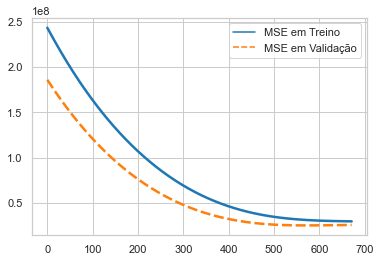

In [24]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [26]:
# Previsões com o modelo treinado
previsoes = modelo.predict(X_test).flatten()

In [27]:
# Imprime as previsões
previsoes

array([14993.944, 14681.389, 11410.543, 11720.416, 15979.839, 10210.039,
        9972.407, 15710.225, 18083.305, 10621.135, 13519.106, 10332.503,
       15045.736, 14653.284, 10498.739, 15571.574, 13746.602, 12455.635,
       16200.155, 16822.36 , 14822.29 , 16309.403, 16296.79 , 19466.455,
       12455.635, 10900.869, 15705.344, 15369.028, 11586.956, 14595.438,
       10118.961, 15588.462, 10309.95 , 12151.645, 17589.723, 15088.642,
       15378.658, 15607.755, 12527.197, 12570.18 , 11995.139, 14897.074,
       12407.214, 10143.635, 13152.39 , 20320.506, 20641.922, 19097.352,
       12430.657, 15401.166, 11564.201, 12696.736], dtype=float32)

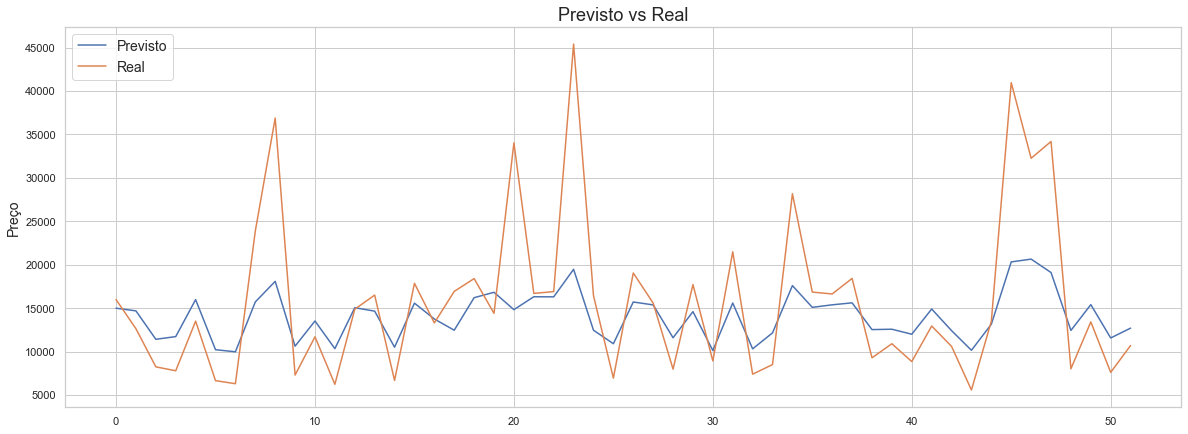

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
plt.plot(previsoes)
plt.plot(y_test.values)
plt.title('Previsto vs Real', fontsize=18)
plt.ylabel('Preço', fontsize=14)
plt.legend(['Previsto', 'Real'], loc='upper left', fontsize=14)

plt.show()

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>